<br>
<br>

# Power Transformer: 

<br>
<br>

In [59]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression


In [60]:
df  = pd.read_csv("dataset/concrete_data.csv")
df.sample(3)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
885,153.0,145.0,113.0,178.0,8.0,867.0,824.0,28,26.23
70,374.0,189.2,0.0,170.1,10.1,926.1,756.7,3,34.40
201,190.7,0.0,125.4,162.1,7.8,1090.0,804.0,28,26.40


In [61]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


<br>
<br>

`দেখবো কোন ভ্যালু শূন্য আছে কিনা থাকলে,box-cox apply করতে পারবো না । `

- check the minimum vale from describe then we get the idea.

<br>
<br>

In [63]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [64]:
X = df.drop(columns=["Strength"])
y = df["Strength"]

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.2)

<br>
<br>

# Applying regression without any transformation:

<br>
<br>

In [66]:
lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

r2_score(y_test,y_pred) * 100


62.61267134611681

In [67]:
cross_val_score(lr,X,y,scoring='r2').mean()

0.46099404916628606

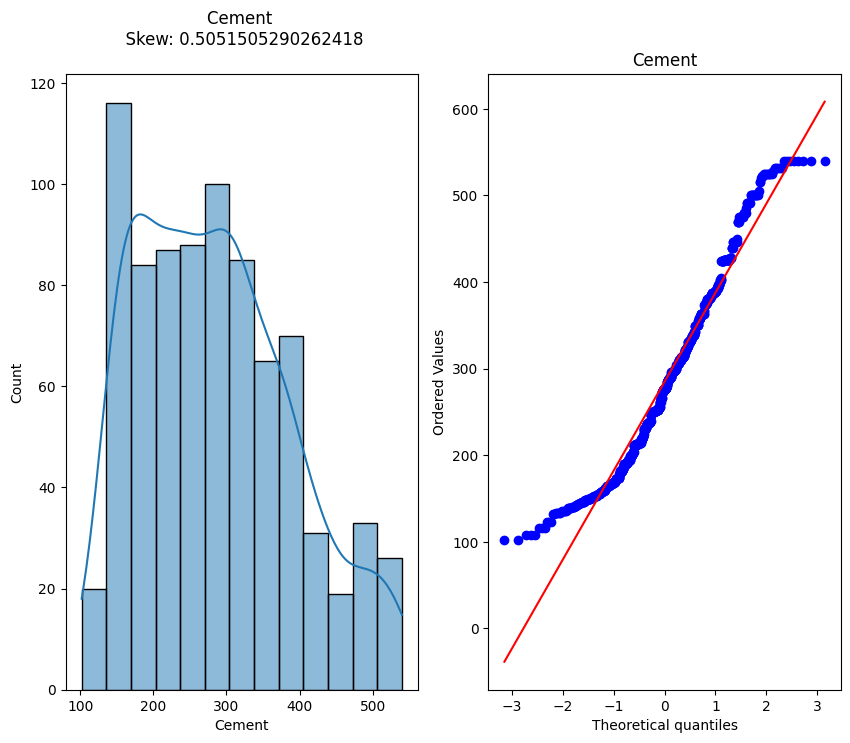

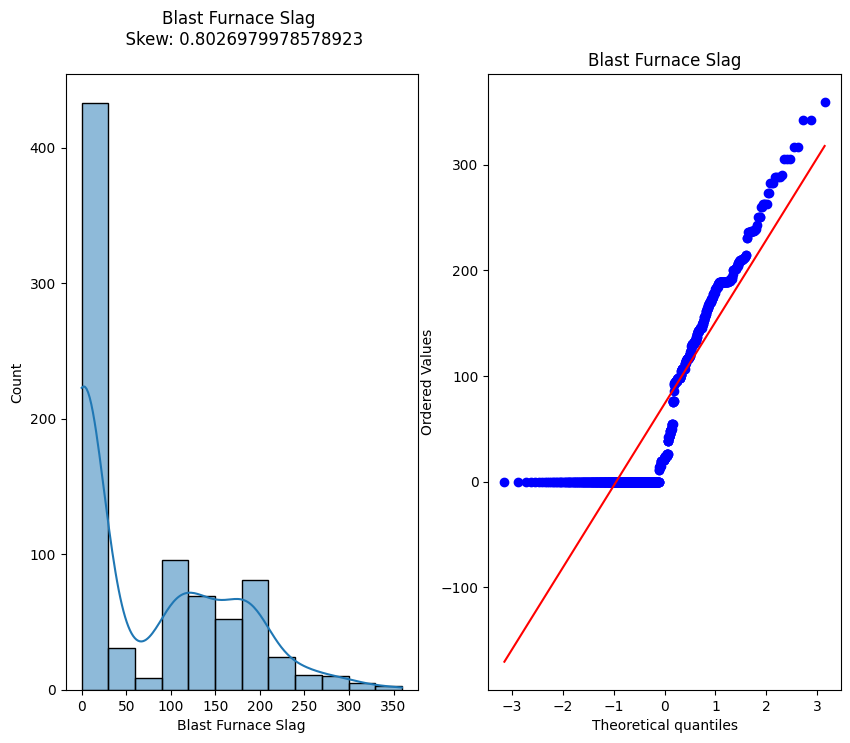

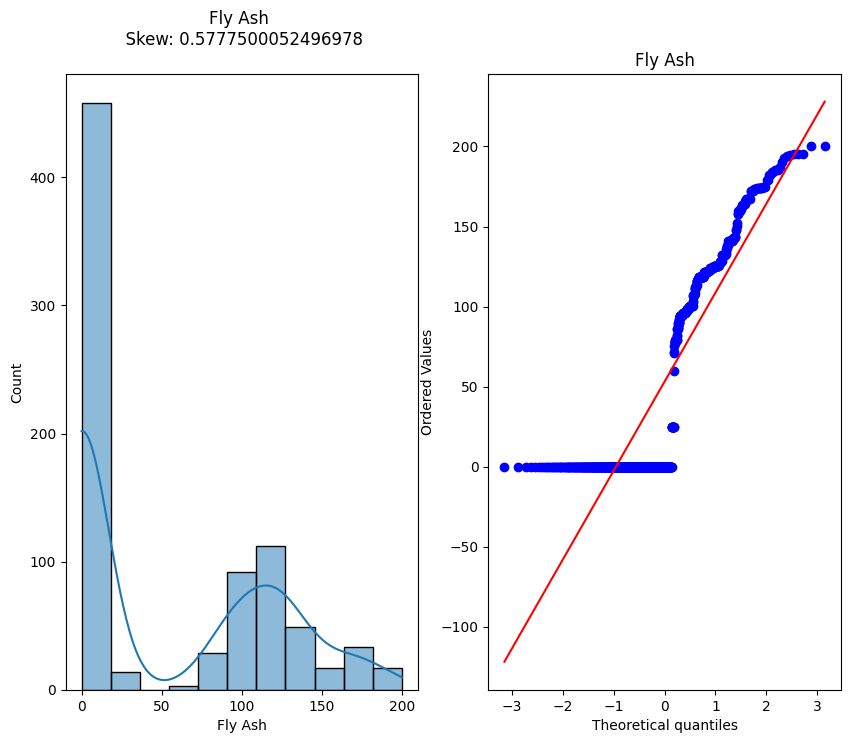

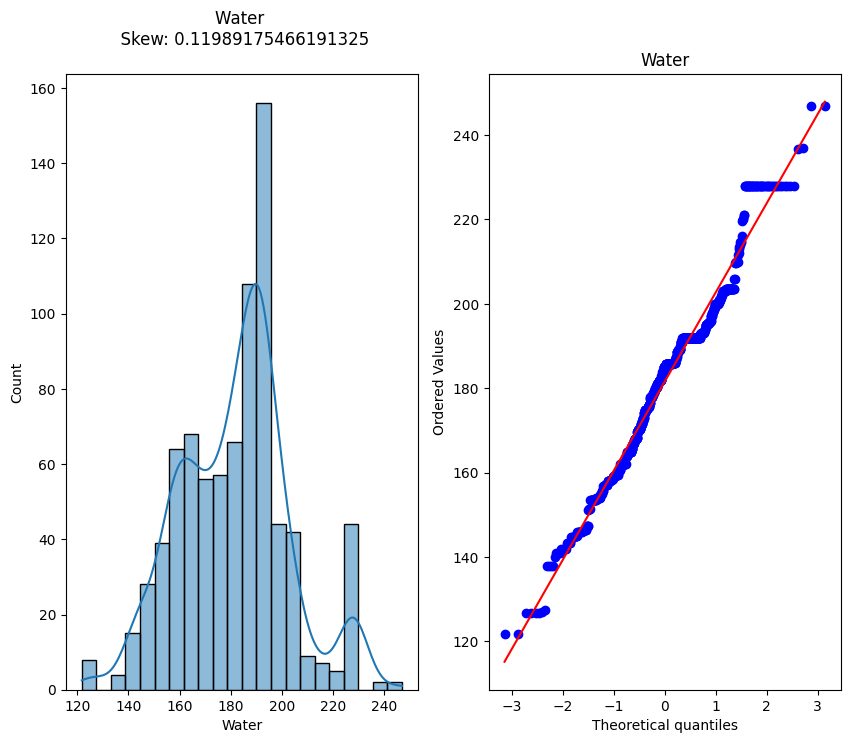

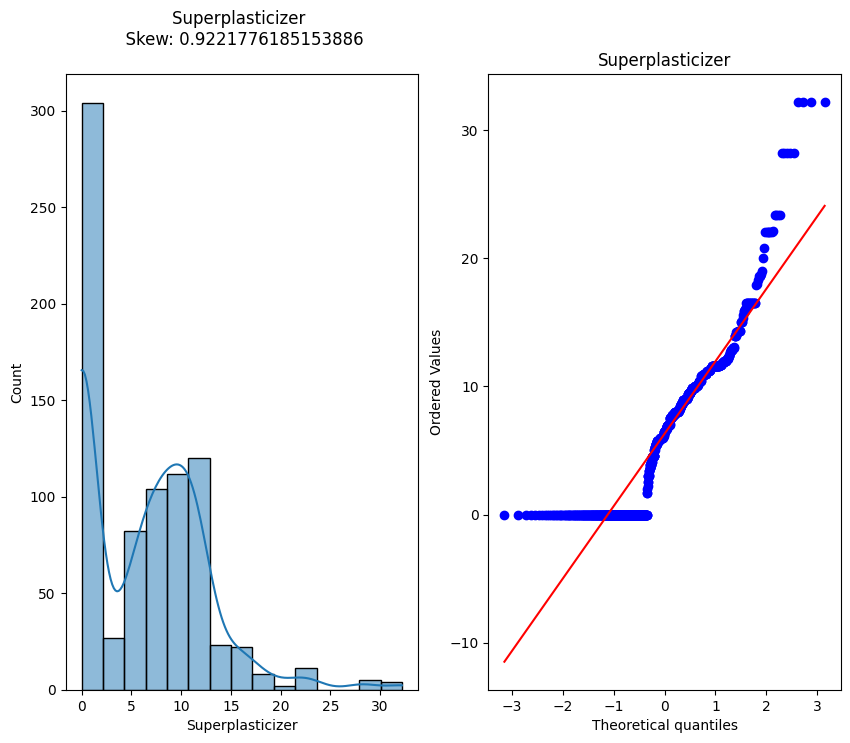

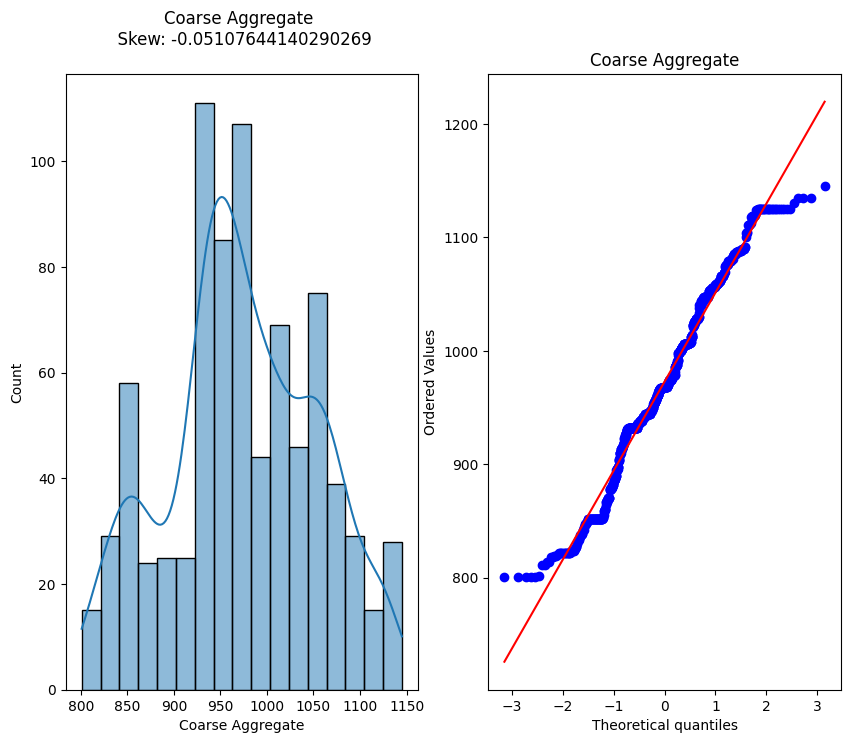

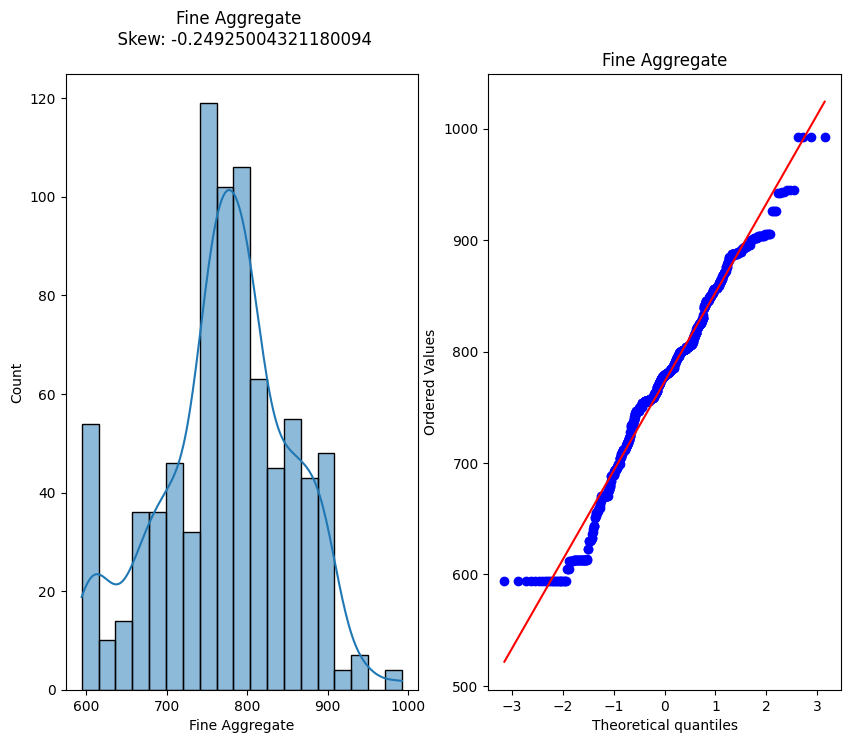

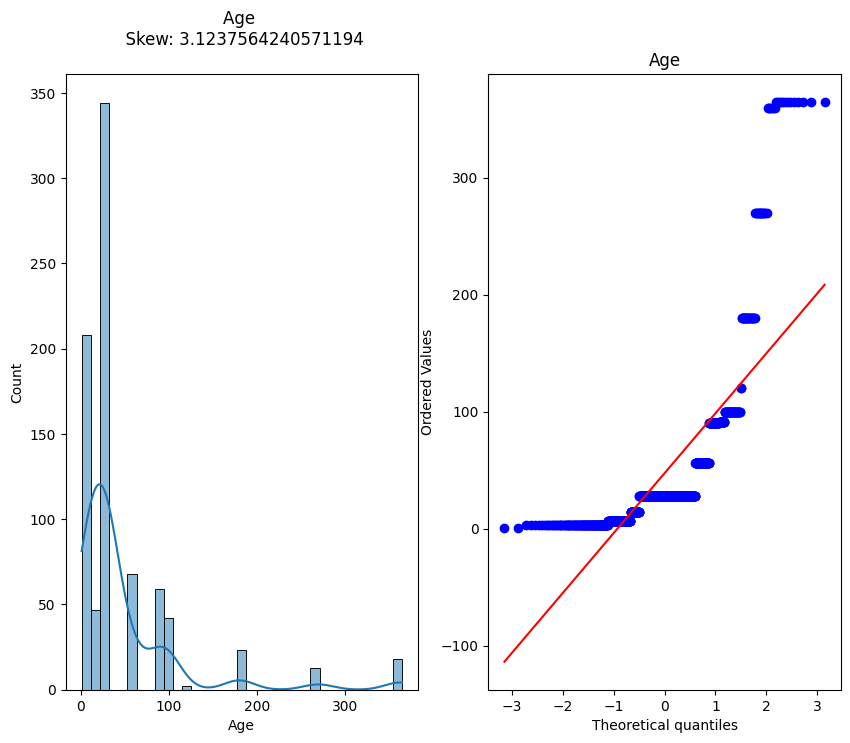

In [68]:
for col in X_train.columns:
    fig ,ax =  plt.subplots(nrows=1,ncols=2,figsize=((10,8)))
    
    sns.histplot(X_train[col],kde=True,ax=ax[0])
    str = col + f" \n  Skew: {X_train[col].skew()} \n "
    ax[0].set_title(str)
    
    stats.probplot(X_train[col],dist="norm",plot=ax[1])
    ax[1].set_title(col)
    
    plt.show()
    

<br>
<br>

# Apply box-cox transformaer:

<br>
<br>

`If we apply box-cox then we get lemda vale equal to the number of our columns number: `


In [69]:

pt = PowerTransformer(method='box-cox')


# we see that, some columns minimun value is zero, so why we add somthing nearly, negligible.
X_train_trnas = pt.fit_transform(X_train+0.0001) 
X_test_trans = pt.fit_transform(X_test+0.0001)

pd.DataFrame({'cols':X_train.columns,'box_cox_lemdas':pt.lambdas_})


,cols,box_cox_lemdas
0,Cement,0.067744
1,Blast Furnace Slag,0.031985
2,Fly Ash,-0.021236
3,Water,1.272122
4,Superplasticizer,0.124161
5,Coarse Aggregate,0.779351
6,Fine Aggregate,1.815528
7,Age,0.109670



<br>

`Cement এ যদি কোন ভ্যালু 140 হয় তাহলে আমরা 140 ^(0.260246) - 1 / (0.260246) calculation হচ্ছে  । `

<br>


<br>

### Now, Apply Linear Regression, on transformed Data:

<br>

In [70]:
lr = LinearRegression()
lr.fit(X_train_trnas,y_train)

y_pred = lr.predict(X_test_trans)

r2_score(y_test,y_pred)*100


77.30997698744734

In [79]:
# using cross_val_score()

pt_box_cox = PowerTransformer(method='box-cox')
X_trans = pt_box_cox.fit_transform(X+0.001)

lr = LinearRegression()

cross_val_score(lr,X_trans,y,scoring='r2').mean()


0.6686000634519231

<br>
<br>

# Plot Graph: before and after appling Transformation:

<br>
<br>

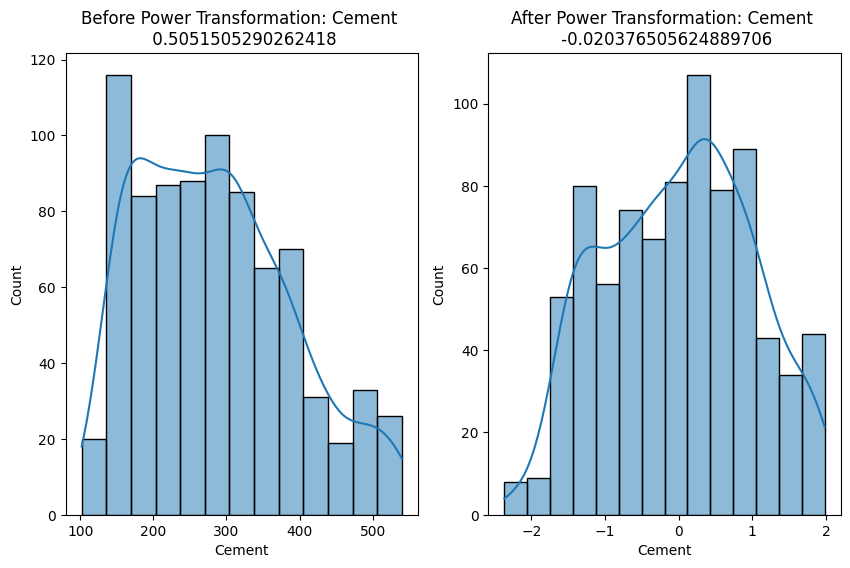

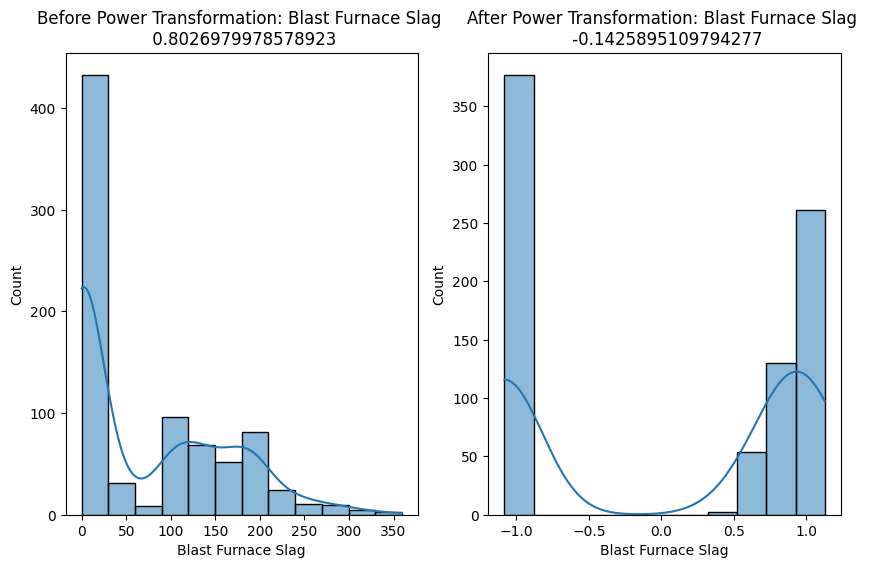

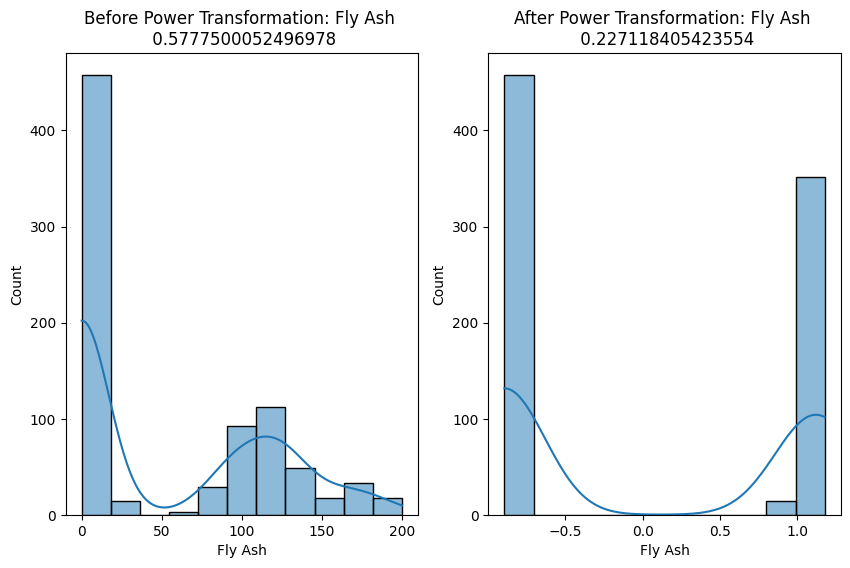

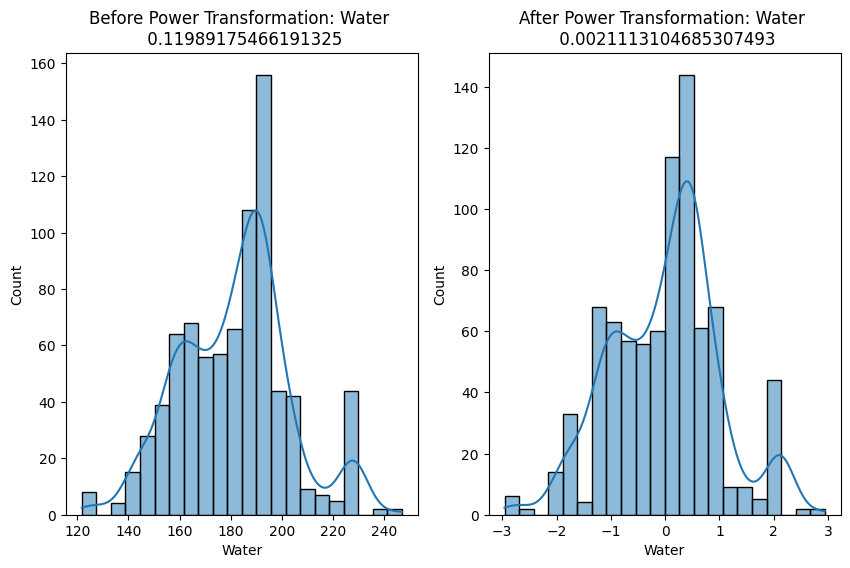

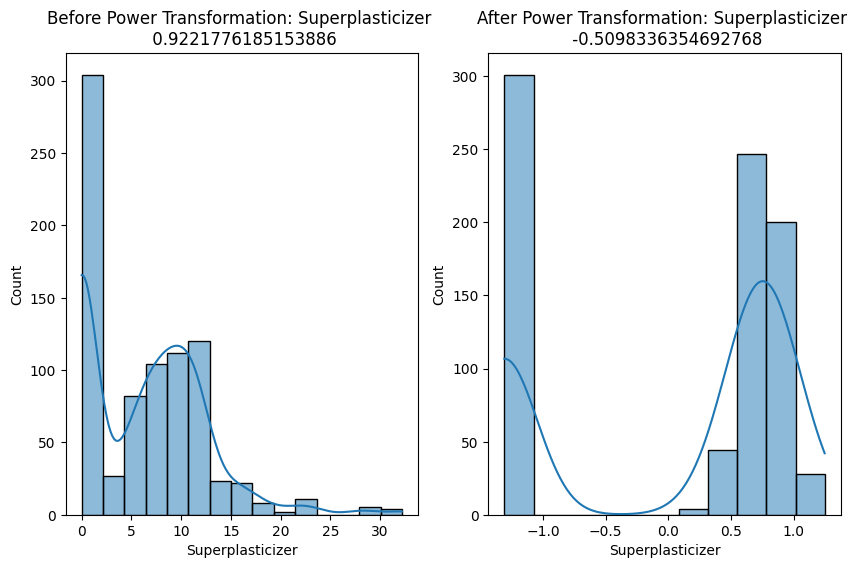

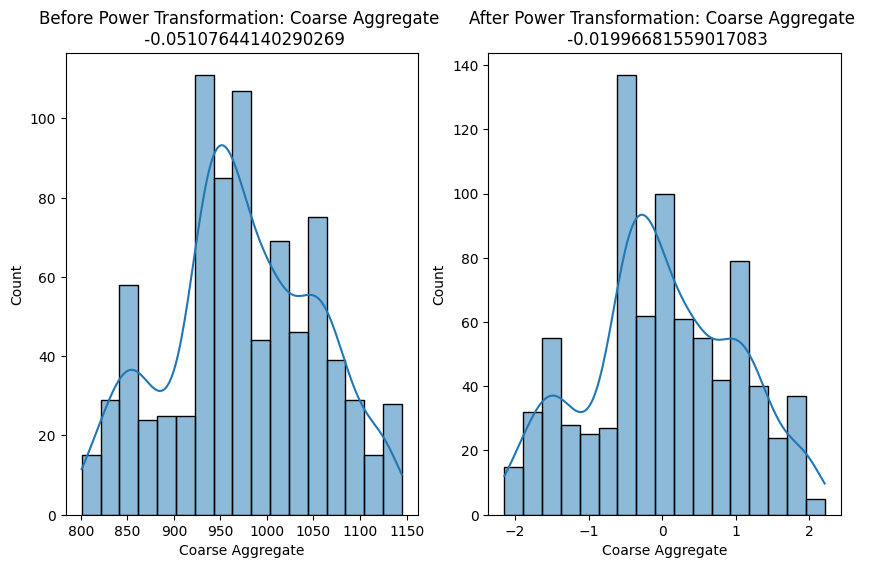

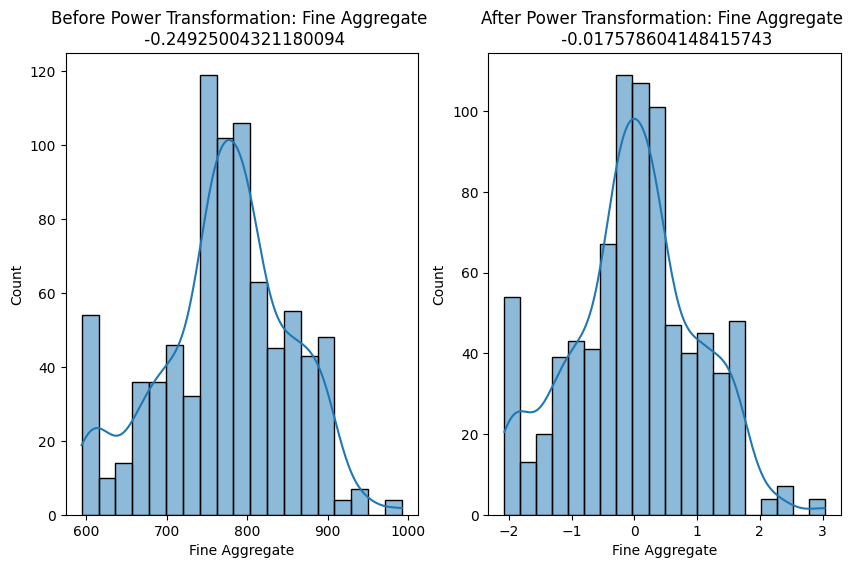

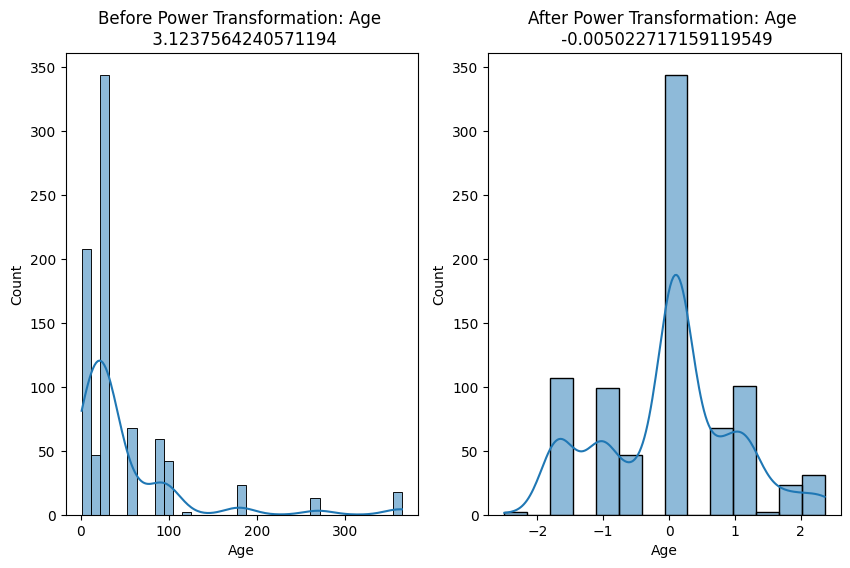

In [72]:
X_train_trans_graph = pd.DataFrame(X_train_trnas,columns=X_train.columns)

for col in X_train_trans_graph:
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,6))
    
    sns.histplot(X_train[col],kde=True,ax=ax[0])
    ax[0].set_title(f"Before Power Transformation: {col} \n {X_train[col].skew()}")
    
    sns.histplot(X_train_trans_graph[col],kde=True,ax=ax[1])
    ax[1].set_title(f"After Power Transformation: {col} \n {X_train_trans_graph[col].skew()}")
    
    plt.show()
    
    

<br>
<br>
<br>

# Applying Yeo-Jhonson:

<br>
<br>
<br>

In [75]:
pt = PowerTransformer(method="yeo-johnson")

X_train_trans2 = pt.fit_transform(X_train)
X_test_trans2 = pt.transform(X_test)

lr = LinearRegression()

lr.fit(X_train_trans2,y_train)

y_pred = lr.predict(X_test_trans2)

print(r2_score(y_test,y_pred))


pd.DataFrame({'cols':X_train.columns, 'Yeo_jonshon_lemdas':pt.lambdas_})


0.8037299827189277


,cols,Yeo_jonshon_lemdas
0,Cement,0.187356
1,Blast Furnace Slag,0.016274
2,Fly Ash,-0.153330
3,Water,0.679934
4,Superplasticizer,0.268116
5,Coarse Aggregate,1.182889
6,Fine Aggregate,1.831416
7,Age,-0.007157


In [77]:
# using cross_val_score()

pt = PowerTransformer(method='yeo-johnson')
X_trans = pt.fit_transform(X)

lr = LinearRegression()

cross_val_score(lr,X_trans,y,scoring='r2').mean()


0.6834625141500866

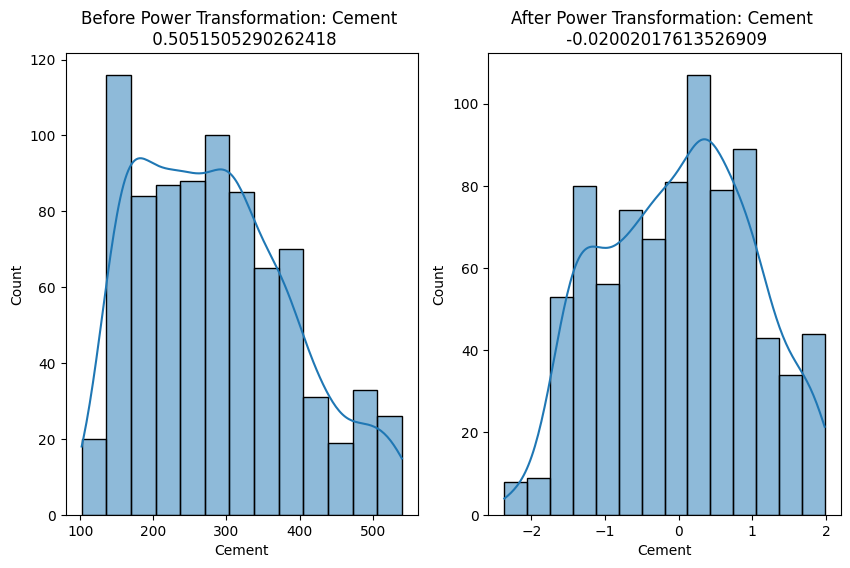

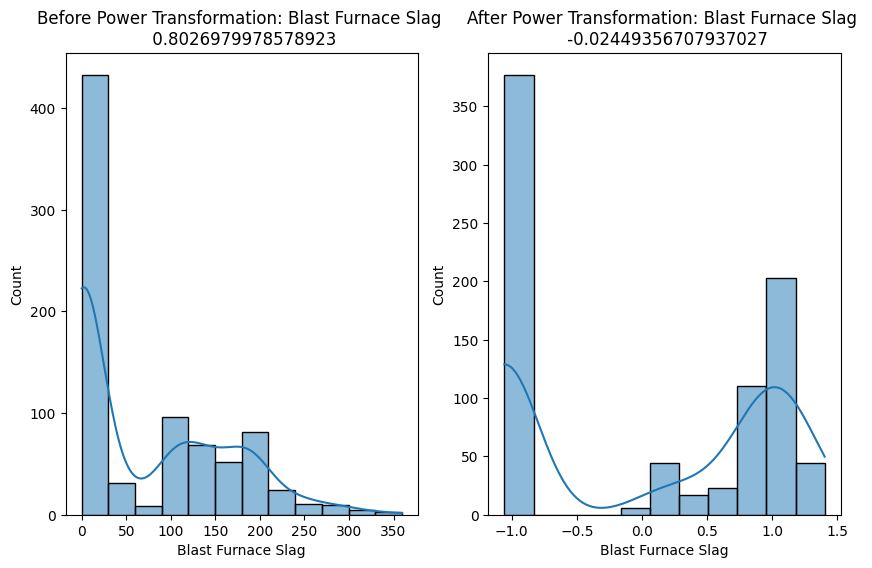

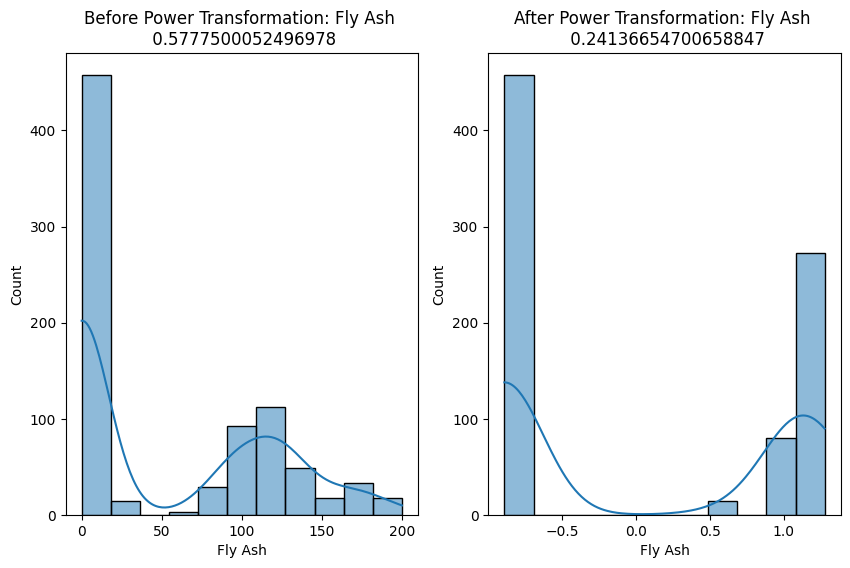

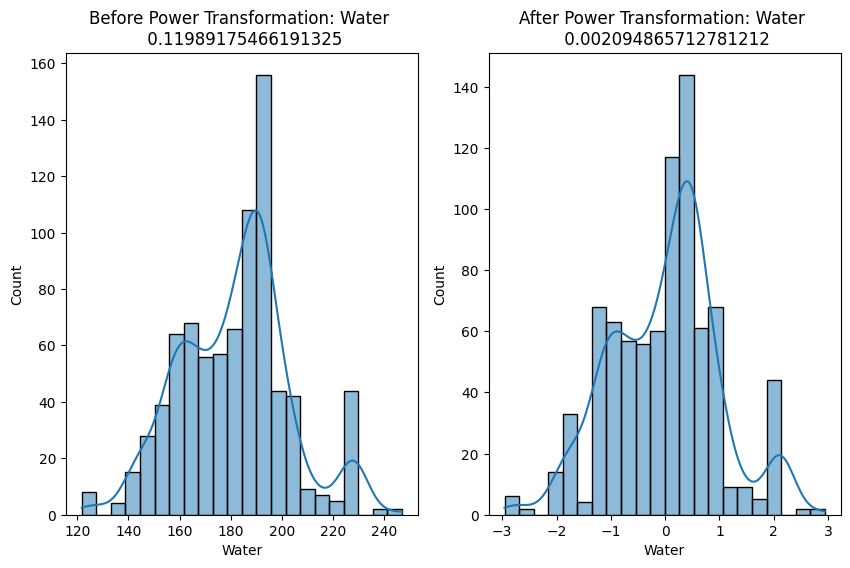

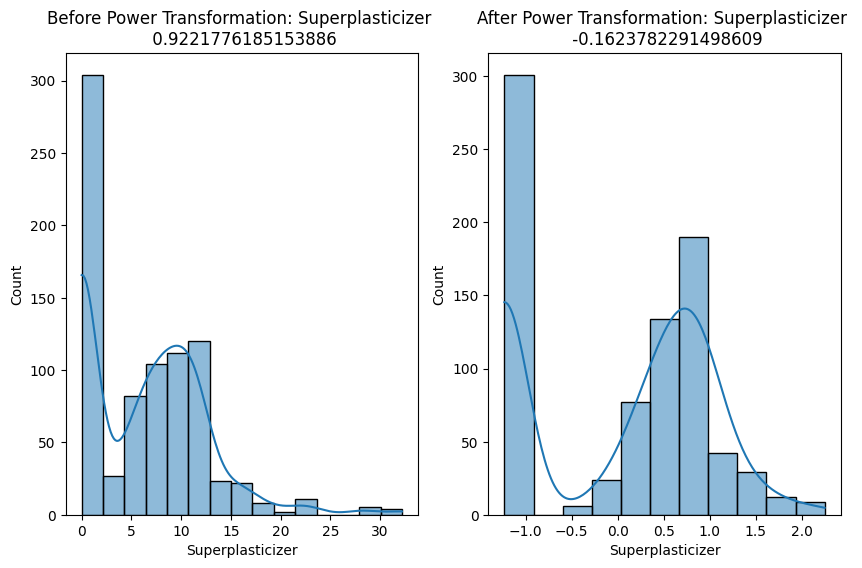

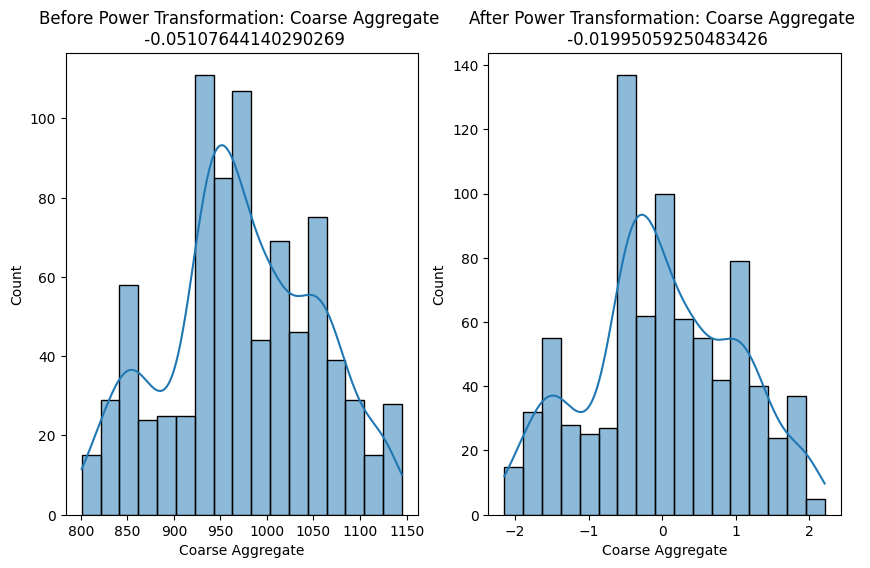

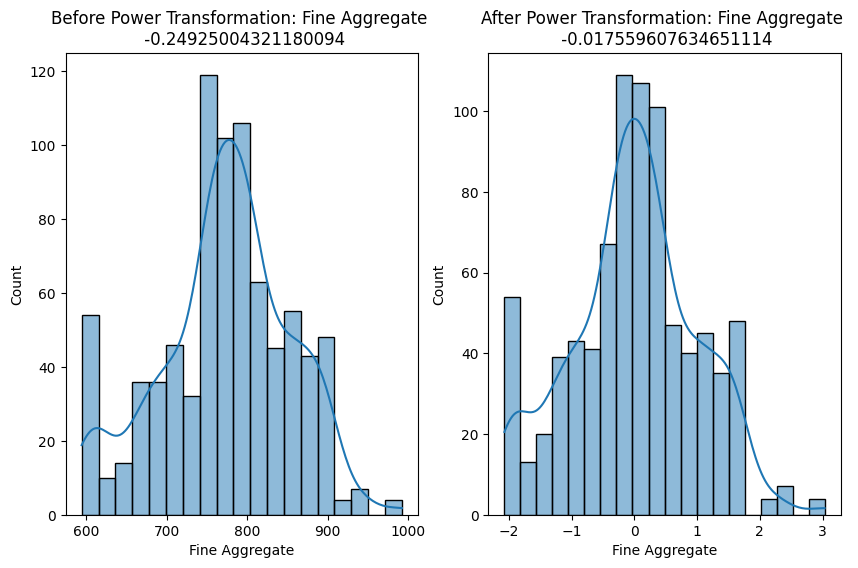

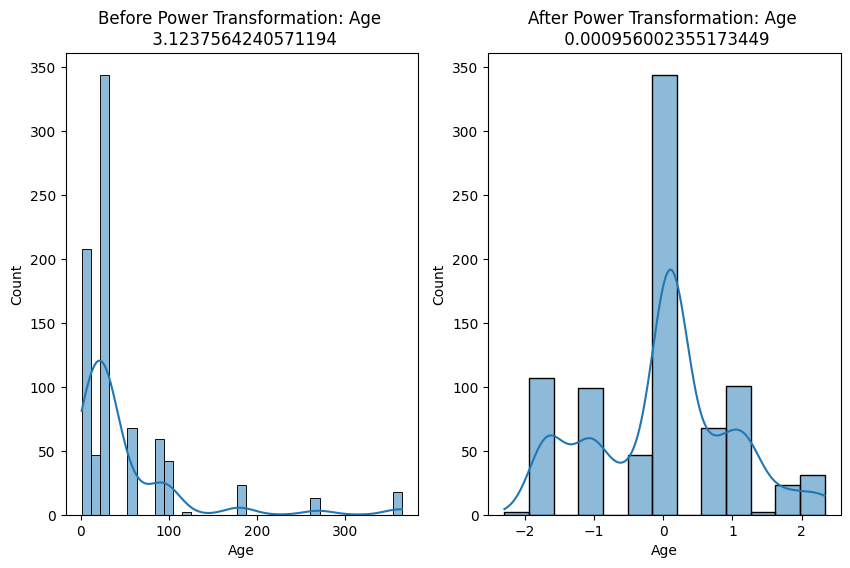

In [78]:
X_train_trans_graph = pd.DataFrame(X_train_trans2,columns=X_train.columns)

for col in X_train_trans_graph:
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,6))
    
    sns.histplot(X_train[col],kde=True,ax=ax[0])
    ax[0].set_title(f"Before Power Transformation: {col} \n {X_train[col].skew()}")
    
    sns.histplot(X_train_trans_graph[col],kde=True,ax=ax[1])
    ax[1].set_title(f"After Power Transformation: {col} \n {X_train_trans_graph[col].skew()}")
    
    plt.show()
    
    

In [80]:
pd.DataFrame({'cols':X_train.columns, 'Yeo_jonshon_lemdas':pt.lambdas_,'box_cox_lemdas':pt_box_cox.lambdas_})


,cols,Yeo_jonshon_lemdas,box_cox_lemdas
0,Cement,0.169544,0.172268
1,Blast Furnace Slag,0.016633,0.034912
2,Fly Ash,-0.136480,-0.052110
3,Water,0.808438,0.809567
4,Superplasticizer,0.264160,0.163377
5,Coarse Aggregate,1.129395,1.129168
6,Fine Aggregate,1.830763,1.829626
7,Age,0.001771,0.048924
